In [45]:
# 라이브러리와 자료 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets
import warnings
warnings.filterwarnings(action='ignore')

def get_iris_df():
    ds = sklearn.datasets.load_iris()   # 데이터
    df = pd.DataFrame(ds['data'], columns=ds['feature_names'])   # ds에서 데이터와 피처 이름을 추출해 데이터 프레임으로 변환
    code_species_map = dict(zip(range(3), ds['target_names']))   # zip 명령어 좋다~
    df['species'] = [code_species_map[c] for c in ds['target']]   # species = target
    return df

df = get_iris_df()
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 히스토그램
히스토그램을 그리고 싶다. → seaborn의 distplot method를 사용한다.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

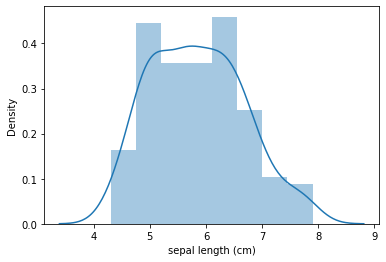

In [46]:
sns.distplot(df['sepal length (cm)'])

<AxesSubplot:xlabel='sepal width (cm)', ylabel='Density'>

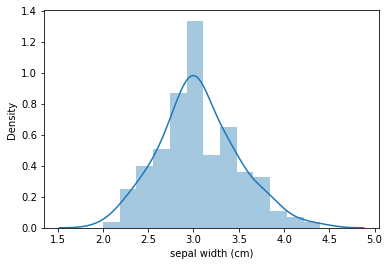

In [47]:
sns.distplot(df['sepal width (cm)'])

<AxesSubplot:xlabel='petal length (cm)', ylabel='Density'>

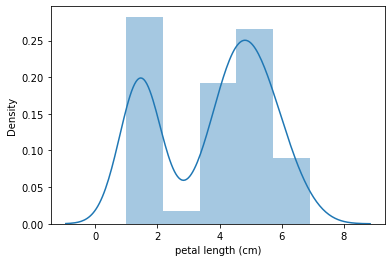

In [48]:
sns.distplot(df['petal length (cm)'])

# 산포도(scatter plot)
산포도를 나타내고 싶다.  → seaborn의 regplot method를 사용한다.
- 그래프에 그려진 직선은 선형회귀곡선으로 변수간의 회귀식을 확인할 수 있다.

Text(0.5, 1.0, 'scatter plot of sepal length and sepal width')

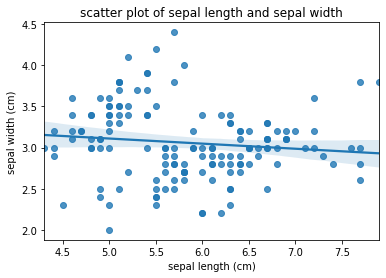

In [49]:
sns.regplot('sepal length (cm)', 'sepal width (cm)', df)   # 첫 번째 자리와 두 번쨰 자리의 이름은 x 축과 y 축으로 넣을 변수의 이름을 쓰면 된다.
plt.title('scatter plot of sepal length and sepal width')   # matplotlib 의 pyplot의 title method로 제목을 지정해줄 수 있다.

# 산포도2(히트맵)
변수 그룹간의 모든 산포도(히트맵)를 보고 싶다. → seaborn의 pairplot을 사용한다.
- 파라미터에 대해 알아보고 싶으면 seaborn.pairplot을 보면 된다.

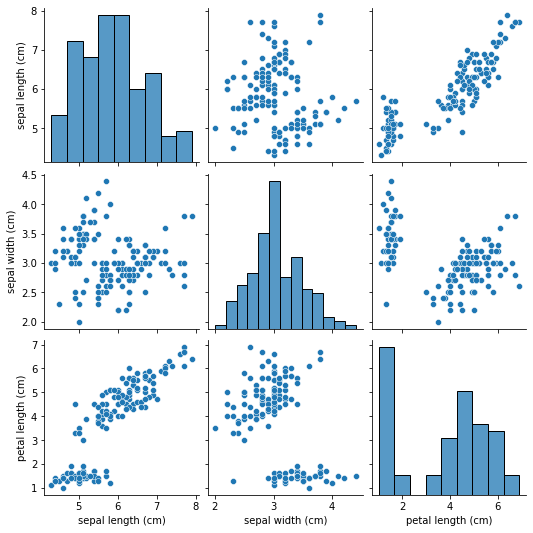

In [34]:
sns.pairplot(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]);

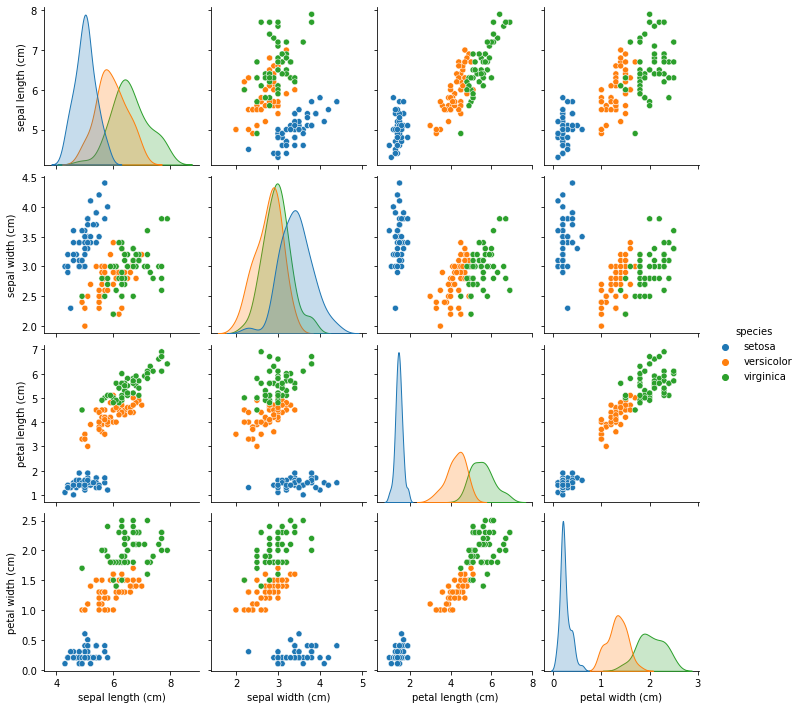

In [35]:
sns.pairplot(df, hue='species');

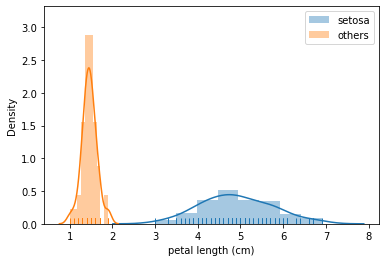

In [50]:
# 인터넷에서 되게 이뻐서 퍼옴...ㅎ
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="others")
plt.legend()
plt.show()

# 패싯 그리드
명목형 변수를 시각화하고 싶다. → seaborn의 factorplot을 사용하자.
- 단순히 하나의 변수에 대해서만 수치를 보는 것이 아닌 col, row, hue 변수를 통해서도 분류해서 수치를 확인할 수 있다.
- factorplot은 보여주고자 하는 목적에 어울리는 다른 종류의 그래프도 지원한다. 예를 들면 상자 그림(kind='box)
- 명목형 변수의 수치를 확인하는 것이므로 

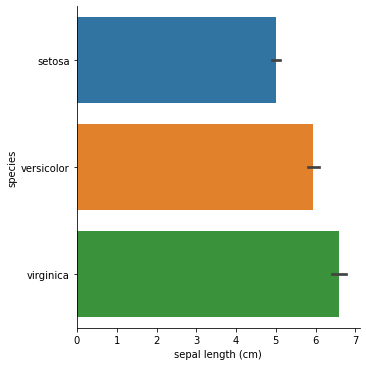

In [51]:
sns.factorplot(x='sepal length (cm)', y='species', kind='bar', data=df)

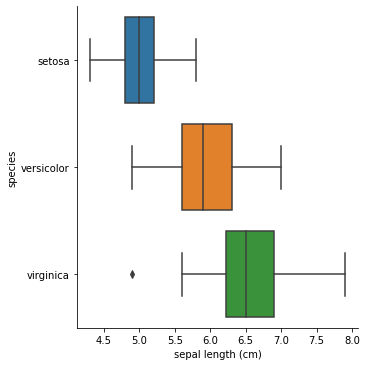

In [52]:
sns.factorplot(x='sepal length (cm)', y='species', kind='box', data=df);   # 상자 그림으로 변형

- 명목형 변수를 많이 포함하고 있는 데이터를 불러와서 더 시각화를 연습해야 한다.